# Final Project
### Week 12

##### Joaquin Cordero

In [1]:
import numpy as np
import pandas as pd

url = "https://raw.githubusercontent.com/jcord014/Cordero530Final/refs/heads/main/gym_members_exercise_tracking.csv"

df = pd.read_csv(url)

In [120]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

Downloaded thinkstats2.py


In [134]:
import thinkstats2
import thinkplot

In [2]:
list(df)

['Age',
 'Gender',
 'Weight (kg)',
 'Height (m)',
 'Max_BPM',
 'Avg_BPM',
 'Resting_BPM',
 'Session_Duration (hours)',
 'Calories_Burned',
 'Workout_Type',
 'Fat_Percentage',
 'Water_Intake (liters)',
 'Workout_Frequency (days/week)',
 'Experience_Level',
 'BMI']

In [5]:
print(df.head())

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

In [7]:
df.rename(columns= {"Weight (kg)": "Weight_kg", "Height (m)": "Height_m", "Workout_Frequency (days/week)": "Workout_Frequency"}, inplace=True)

In [9]:
print("Age Null:", df.Age.isnull().sum())
print("Gender Null:", df.Gender.isnull().sum())
print("Weight_kg Null:", df.Weight_kg.isnull().sum())
print("Height_m Null:", df.Height_m.isnull().sum())
print("Workout_Type Null:", df.Workout_Type.isnull().sum())
print("Fat_Percentage Null:", df.Fat_Percentage.isnull().sum())
print("Workout_Frequency Null:", df.Workout_Frequency.isnull().sum())

Age Null: 0
Gender Null: 0
Weight_kg Null: 0
Height_m Null: 0
Workout_Type Null: 0
Fat_Percentage Null: 0
Workout_Frequency Null: 0


In [11]:
df['Weight_lbs'] = df.Weight_kg * 2.20462
df['Height_ft'] = df.Height_m * 3.28084

list(df)

['Age',
 'Gender',
 'Weight_kg',
 'Height_m',
 'Max_BPM',
 'Avg_BPM',
 'Resting_BPM',
 'Session_Duration (hours)',
 'Calories_Burned',
 'Workout_Type',
 'Fat_Percentage',
 'Water_Intake (liters)',
 'Workout_Frequency',
 'Experience_Level',
 'BMI',
 'Weight_lbs',
 'Height_ft']

In [21]:
df.Gender.value_counts()

Gender
Male      511
Female    462
Name: count, dtype: int64

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

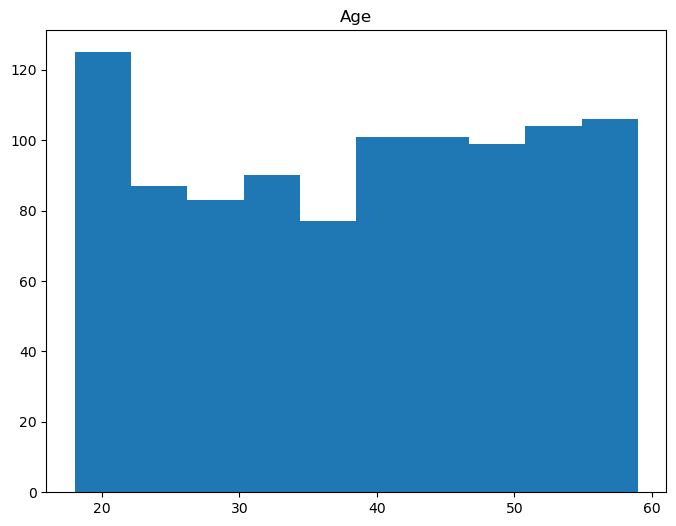

In [17]:
df.hist(column = "Age", bins=10, grid=False, figsize=(8,6))

In [61]:
''' 
    Assigned values to 'Gender' to be able to use Histogram and created column 'Gender_ID'
    Values assigned:
    Male = 0
    Female = 1
'''
df['Gender_ID'] = np.where(df['Gender'] == 'Male', 0, 1) 

'''
    Checks if value count remains the same
'''
df.Gender_ID.value_counts()

Gender_ID
0    511
1    462
Name: count, dtype: int64

array([[<Axes: title={'center': 'Gender_ID'}>]], dtype=object)

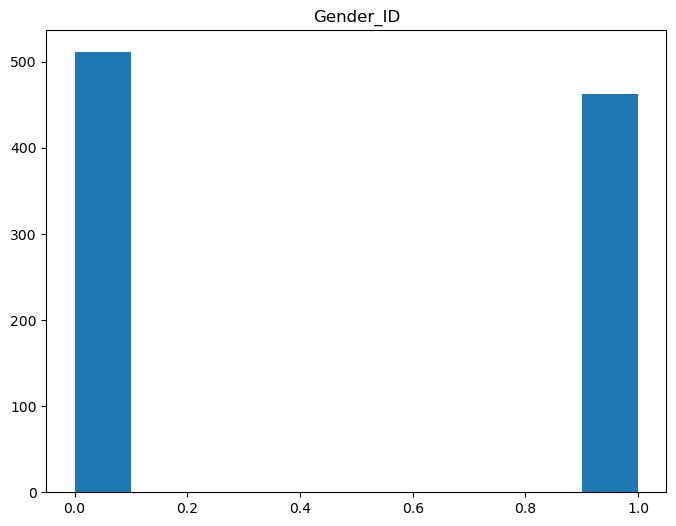

In [63]:
df.hist(column = "Gender_ID", bins=10, grid=False, figsize=(8,6))

array([[<Axes: title={'center': 'Weight_lbs'}>]], dtype=object)

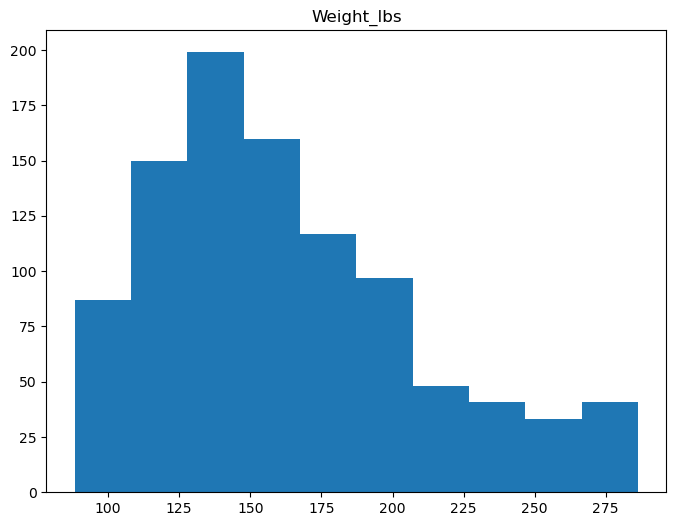

In [43]:
df.hist(column = "Weight_lbs", bins=10, grid=False, figsize=(8,6))

array([[<Axes: title={'center': 'Height_ft'}>]], dtype=object)

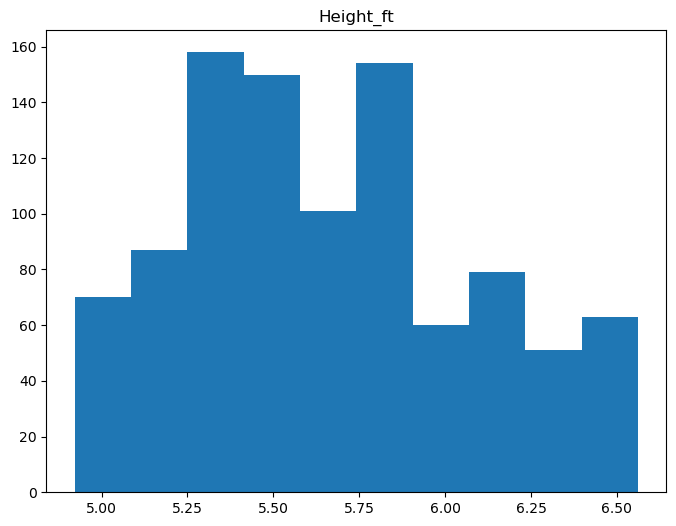

In [45]:
df.hist(column = "Height_ft", bins=10, grid=False, figsize=(8,6))

In [47]:
df.Workout_Type.value_counts()

Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

In [65]:
conditions = [
    (df['Workout_Type'] == 'Strength'),
    (df['Workout_Type'] == 'Cardio'),
    (df['Workout_Type'] == 'Yoga'),
    (df['Workout_Type'] == 'HIIT'),
]

''' 
    Assigned values to 'Workout_Type' to be able to use Histogram and created column 'Workout_Type_ID'
    Values assigned
    Strength = 0
    Cardio = 1
    Yoga = 2
    HIIT = 3
    else = -1
'''
values = [0, 1, 2, 3]

df['Workout_Type_ID'] = np.select(conditions, values, default=-1)

'''
    Checks if value count remains the same
'''
df.Workout_Type_ID.value_counts()



Workout_Type_ID
0    258
1    255
2    239
3    221
Name: count, dtype: int64

array([[<Axes: title={'center': 'Workout_Type_ID'}>]], dtype=object)

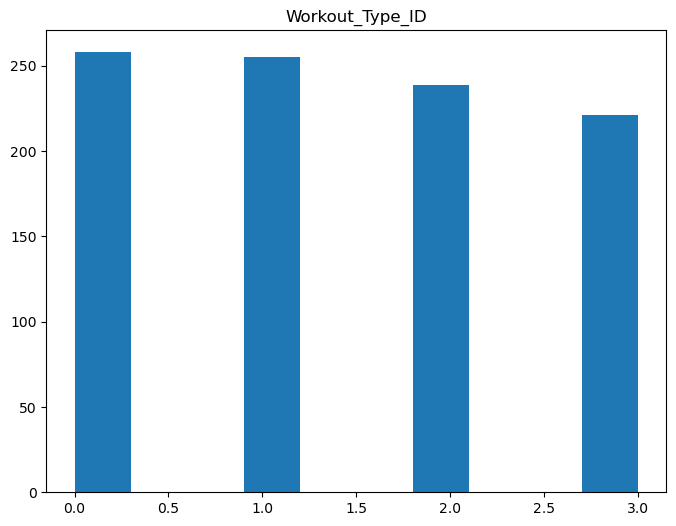

In [69]:
df.hist(column = "Workout_Type_ID", bins=10, grid=False, figsize=(8,6))

array([[<Axes: title={'center': 'Fat_Percentage'}>]], dtype=object)

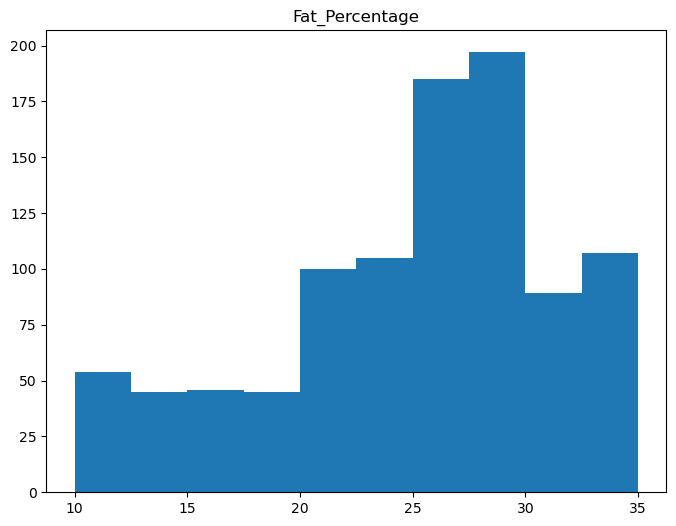

In [71]:
df.hist(column = "Fat_Percentage", bins=10, grid=False, figsize=(8,6))

array([[<Axes: title={'center': 'Workout_Frequency'}>]], dtype=object)

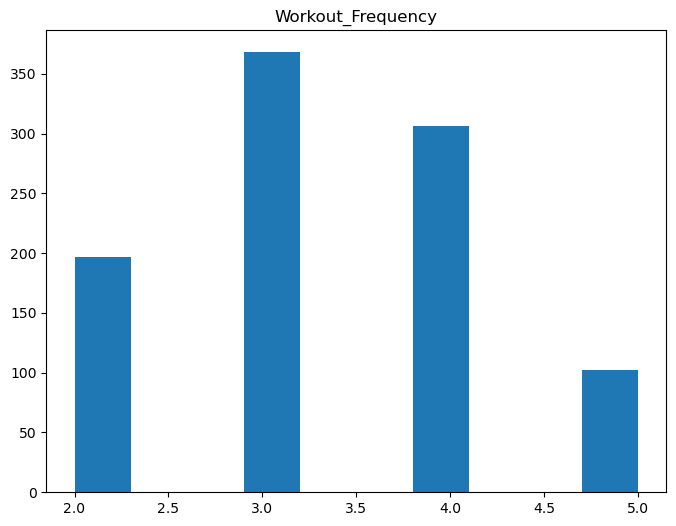

In [73]:
df.hist(column = "Workout_Frequency", bins=10, grid=False, figsize=(8,6))

In [103]:
#Mean, Mode, Spread, and Tails 

print("Age Mean:", round(df.Age.mean(), 2))
print("Age Mode:", df.Age.mode()[0])
print("Age Variance:", round(df.Age.var(), 2))
print("Age STD:", round(df.Age.std(), 2))
print("Age Skewness:", round(df.Age.skew(), 2))
print("Age Kurtosis:", round(df.Age.kurt(), 2))
print('')

print("Gender_ID Mean:", round(df.Gender_ID.mean(), 2))
print("Gender_ID Mode:", df.Gender_ID.mode()[0])
print("Gender_ID Variance:", round(df.Gender_ID.var(), 2))
print("Gender_ID STD:", round(df.Gender_ID.std(), 2))
print("Gender_ID Skewness:", round(df.Gender_ID.skew(), 2))
print("Gender_ID Kurtosis:", round(df.Gender_ID.kurt(), 2))
print('')

print("Weight_lbs Mean:", round(df.Weight_lbs.mean(), 2))
print("Weight_lbs Mode:", df.Weight_lbs.mode()[0])
print("Weight_lbs Variance:", round(df.Weight_lbs.var(), 2))
print("Weight_lbs STD:", round(df.Weight_lbs.std(), 2))
print("Weight_lbs Skewness:", round(df.Weight_lbs.skew(), 2))
print("Weight_lbs Kurtosis:", round(df.Weight_lbs.kurt(), 2))
print('')

print("Height_ft Mean:", round(df.Height_ft.mean(), 2))
print("Height_ft Mode:", df.Height_ft.mode()[0])
print("Height_ft Variance:", round(df.Height_ft.var(), 2))
print("Height_ft STD:", round(df.Height_ft.std(), 2))
print("Height_ft Skewness:", round(df.Height_ft.skew(), 2))
print("Height_ft Kurtosis:", round(df.Height_ft.kurt(), 2))
print('')

print("Workout_Type_ID Mean:", round(df.Workout_Type_ID.mean(), 2))
print("Workout_Type_ID Mode:", df.Workout_Type_ID.mode()[0])
print("Workout_Type_ID Variance:", round(df.Workout_Type_ID.var(), 2))
print("Workout_Type_ID STD:", round(df.Workout_Type_ID.std(), 2))
print("Workout_Type_ID Skewness:", round(df.Workout_Type_ID.skew(), 2))
print("Workout_Type_ID Kurtosis:", round(df.Workout_Type_ID.kurt(), 2))
print('')

print("Fat_Percentage Mean:", round(df.Fat_Percentage.mean(), 2))
print("Fat_Percentage Mode:", df.Fat_Percentage.mode()[0])
print("Fat_Percentage Variance:", round(df.Fat_Percentage.var(), 2))
print("Fat_Percentage STD:", round(df.Fat_Percentage.std(), 2))
print("Fat_Percentage Skewness:", round(df.Fat_Percentage.skew(), 2))
print("Fat_Percentage Kurtosis:", round(df.Fat_Percentage.kurt(), 2))
print('')

print("Workout_Frequency Mean:", round(df.Workout_Frequency.mean(), 2))
print("Workout_Frequency Mode:", df.Workout_Frequency.mode()[0])
print("Workout_Frequency Variance:", round(df.Workout_Frequency.var(), 2))
print("Workout_Frequency STD:", round(df.Workout_Frequency.std(), 2))
print("Workout_Frequency Skewness:", round(df.Workout_Frequency.skew(), 2))
print("Workout_Frequency Kurtosis:", round(df.Workout_Frequency.kurt(), 2))

Age Mean: 38.68
Age Mode: 43
Age Variance: 148.38
Age STD: 12.18
Age Skewness: -0.08
Age Kurtosis: -1.22

Gender_ID Mean: 0.47
Gender_ID Mode: 0
Gender_ID Variance: 0.25
Gender_ID STD: 0.5
Gender_ID Skewness: 0.1
Gender_ID Kurtosis: -1.99

Weight_lbs Mean: 162.82
Weight_lbs Mode: 127.20657399999999
Weight_lbs Variance: 2185.98
Weight_lbs STD: 46.75
Weight_lbs Skewness: 0.77
Weight_lbs Kurtosis: -0.02

Height_ft Mean: 5.65
Height_ft Mode: 5.314960800000001
Height_ft Variance: 0.18
Height_ft STD: 0.42
Height_ft Skewness: 0.34
Height_ft Kurtosis: -0.72

Workout_Type_ID Mean: 1.43
Workout_Type_ID Mode: 0
Workout_Type_ID Variance: 1.23
Workout_Type_ID STD: 1.11
Workout_Type_ID Skewness: 0.08
Workout_Type_ID Kurtosis: -1.33

Fat_Percentage Mean: 24.98
Fat_Percentage Mode: 28.1
Fat_Percentage Variance: 39.18
Fat_Percentage STD: 6.26
Fat_Percentage Skewness: -0.64
Fat_Percentage Kurtosis: -0.34

Workout_Frequency Mean: 3.32
Workout_Frequency Mode: 3
Workout_Frequency Variance: 0.83
Workout_Fre

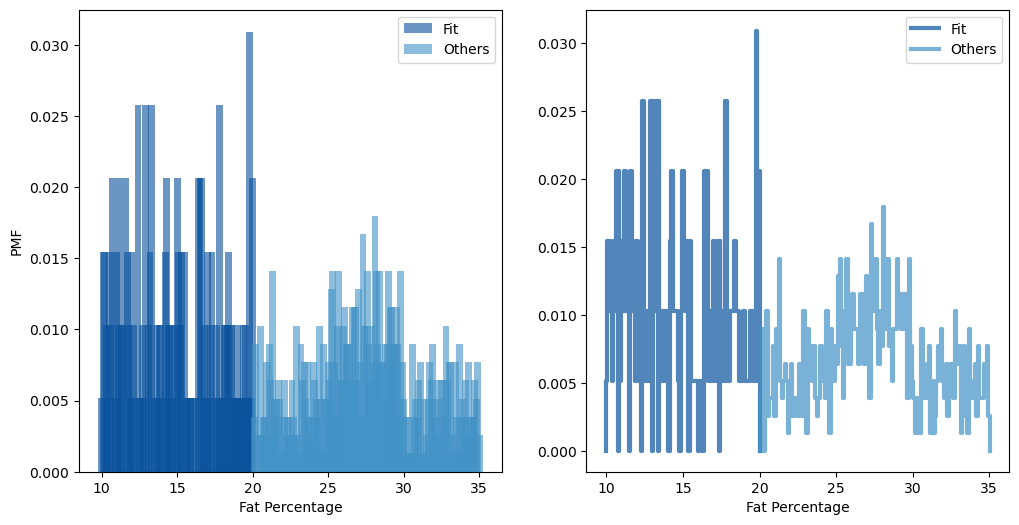

<Figure size 800x600 with 0 Axes>

In [180]:
#Fat Percentage as FP PMF

FP_Fit = df[df.Fat_Percentage <= 20]['Fat_Percentage']
FP_Others = df[df.Fat_Percentage > 20]['Fat_Percentage']

FP_Fit_pmf = thinkstats2.Pmf(FP_Fit, label='Fit')
FP_Others_pmf = thinkstats2.Pmf(FP_Others, label='Others')

width = 0.45
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(FP_Fit_pmf, width=width)
thinkplot.Hist(FP_Others_pmf, width=width)
thinkplot.Config(xlabel="Fat Percentage", ylabel="PMF")

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([FP_Fit_pmf, FP_Others_pmf])
thinkplot.Show(xlabel='Fat Percentage')

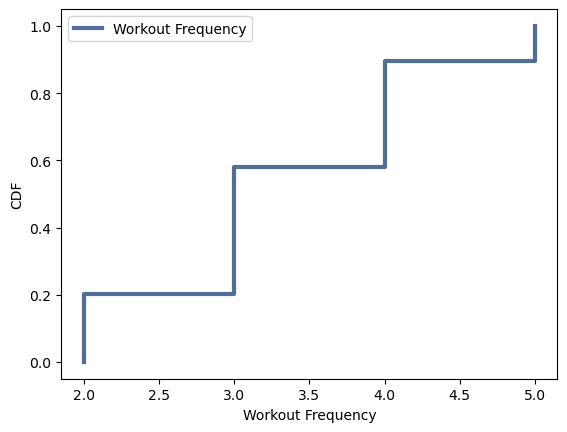

In [192]:
cdf = thinkstats2.Cdf(df.Workout_Frequency, label='Workout Frequency')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Workout Frequency', ylabel='CDF', loc='upper left')

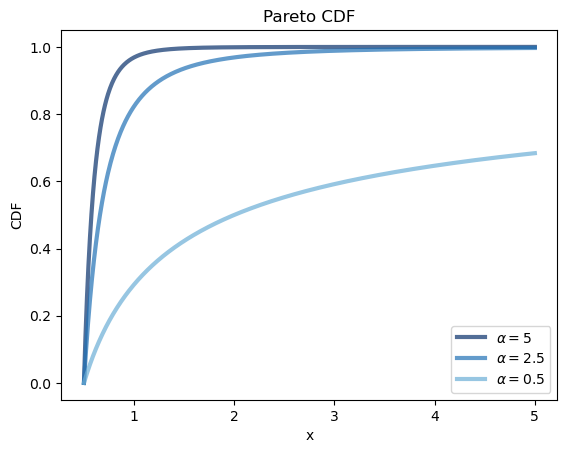

In [206]:
xmin = 0.5

thinkplot.PrePlot(3)
for alpha in [5, 2.5, 0.5]:
    xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 5, n=900)
    thinkplot.Plot(xs, ps, label=r"$\alpha=%g$" % alpha)

thinkplot.Config(title="Pareto CDF", xlabel="x", ylabel="CDF", loc="lower right")

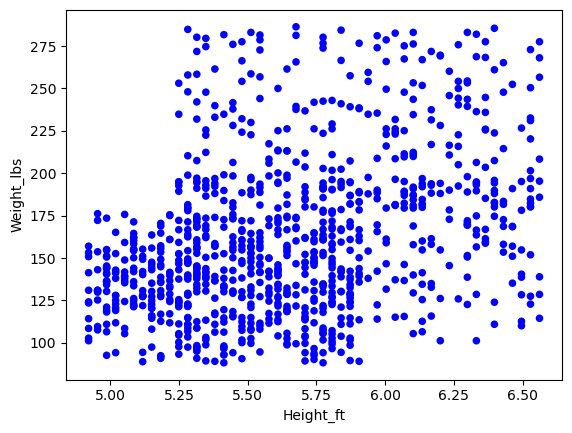

In [232]:
Height_ft = df['Height_ft']
Weight_lbs = df['Weight_lbs']

thinkplot.Scatter(Height_ft, Weight_lbs, alpha=1.0)
thinkplot.Config(xlabel='Height_ft',
                 ylabel='Weight_lbs')

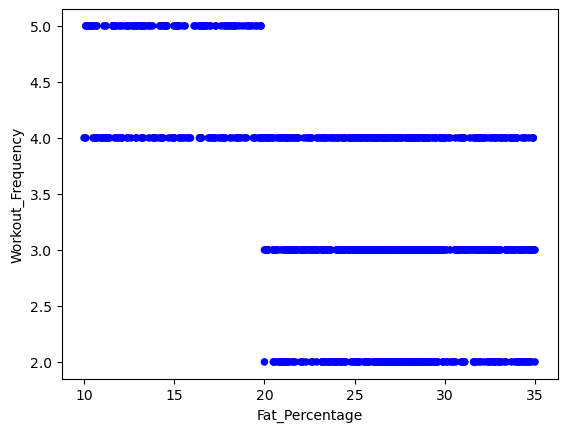

In [234]:
Fat_Percentage = df['Fat_Percentage']
Workout_Frequency = df['Workout_Frequency']

thinkplot.Scatter(Fat_Percentage, Workout_Frequency, alpha=1.0)
thinkplot.Config(xlabel='Fat_Percentage',
                 ylabel='Workout_Frequency')

In [246]:
# covariance, Pearson’s correlation, and Non-Linear Relationships 

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [238]:
Cov(Height_ft, Weight_lbs)

7.14982043607389

In [240]:
Corr(Height_ft, Weight_lbs)

0.36532120261488915

In [248]:
SpearmanCorr(Height_ft, Weight_lbs)

0.3640465938437414

In [242]:
Cov(Fat_Percentage, Workout_Frequency)

-3.0662177877724246

In [244]:
Corr(Fat_Percentage, Workout_Frequency)

-0.5370595482740361

In [250]:
SpearmanCorr(Fat_Percentage, Workout_Frequency)

-0.44382714684063307

In [262]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

cleaned = df.dropna(subset=['Fat_Percentage', 'Workout_Frequency'])
data = cleaned.Fat_Percentage.values, cleaned.Workout_Frequency.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
print("P-Value:", pvalue)

P-Value: 0.0


In [254]:
ht.actual, ht.MaxTestStat()

(0.5370595482740361, 0.10469083600084225)

In [256]:
import statsmodels.formula.api as smf

In [260]:
formula = 'Fat_Percentage ~ Workout_Frequency + Height_ft + Weight_lbs + Gender_ID + Age + Workout_Type_ID'
results = smf.ols(formula, data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Fat_Percentage   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          2.32e-128
Time:                        16:41:22   Log-Likelihood:                -2858.4
No. Observations:                 973   AIC:                             5731.
Df Residuals:                     966   BIC:                             5765.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            34.0387      2.757     12.348      0.000      28.629      39.448
Workout_Frequency    -3.7327      0.161    -23.176      0.000      -4.049      -3.417
Height_ft             0.0795      0.433      0.184      0.854      -0.770       0.929
Weight_lbs            0.0026      0.004      0.665      0.506      -0.005       0.010
Gender_ID             5.4117      0.416     13.023      0.000       4.596       6.227
Age                   0.0104      0.012      0.856      0.392      -0.013       0.034
Workout_Type_ID      -0.3504      0.133     -2.642      0.008      -0.611      -0.090
==============================================================================
Omnibus:                       56.484   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.573
Skew:                          -0.014   Prob(JB):                     2.07e-05
Kurtosis:                       2.271   Cond. No.                     3.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""